# Weather Forecast using OpenMeteo API

## Introduction

[Open-Meteo](https://open-meteo.com/) is an open-source weather API that allows you to easily query and extract weather forecasts from multiple models. It also offers a Historical Weather API to get past weather data. In this tutorial, we will work with the [Weather Forecast API](https://open-meteo.com/en/docs) and get multiple variables for a given location.

## Overview of the Task

We will get a 10-day forecast for multiple weather variables and save the results as a CSV file. We will also get hourly forecast for temperature and create a chart.


**Outputs**:
*  `daily_forecast.csv`: A CSV file containing 10-day forecast for the chosen location.
* `hourly_forecast.png`: A PNG image showing the chart of hourly temperature forecast.

## Setup and Data Download

In [1]:
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy
import os
import pandas as pd
import requests

In [2]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

## Configuration

Select the location and variables of interest.

In [ ]:
# Coordinates in Latitude/Longitude format
location = (23.025, 72.564)

# Use the TZ identifier from
# https://en.wikipedia.org/wiki/List_of_tz_database_time_zones
timezone = 'Asia/Kolkata'

# Weather variables to query
# See all variables at https://open-meteo.com/en/docs#daily_parameter_definition
daily_forecast_variables = [
    'temperature_2m_min', 'temperature_2m_max',
    'relative_humidity_2m_mean', 'precipitation_sum',
]
# See all variables at https://open-meteo.com/en/docs#hourly_parameter_definition
hourly_forecast_variable = 'temperature_2m'

# We can query upto 16-days in the future
forecast_days = 10

## Get Daily Forecast

We can get a daily forecast by specifying the `daily` parameter to the request. Configure a dictionary of required parameters and query the URL using the `requests` library.

In [4]:
params = {
	'latitude': location[0],
	'longitude': location[1],
	'daily': daily_forecast_variables,
	'forecast_days': forecast_days,
  'timezone': timezone
}
url = 'https://api.open-meteo.com/v1/forecast'
responses = requests.get(url, params=params)

Read the API JSON response and convert it to a dictionary.

In [5]:
data = responses.json()

The response contains the daily forecast in the `daily` field. Extract it and convert it to a Pandas DataFrame.

In [6]:
daily_forecast = data.get('daily')
daily_forecast_df = pd.DataFrame(daily_forecast)
daily_forecast_df

,time,temperature_2m_min,temperature_2m_max,relative_humidity_2m_mean,precipitation_sum
0,2025-06-26,26.7,29.2,91,34.8
1,2025-06-27,26.0,29.4,91,18.2
2,2025-06-28,26.0,28.4,87,2.3
3,2025-06-29,25.8,31.2,84,3.1
4,2025-06-30,26.4,33.2,79,0.3
5,2025-07-01,26.5,32.9,79,0.3
6,2025-07-02,26.5,28.2,91,21.0
7,2025-07-03,25.6,31.1,86,36.6
8,2025-07-04,26.5,28.8,78,3.0
9,2025-07-05,26.2,30.7,74,0.9


Save the results to a CSV file.

In [7]:
output_file = 'daily_forecast.csv'
output_path = os.path.join(output_folder, output_file)

daily_forecast_df.to_csv(output_path, index=False)

## Get Hourly Forecast

The OpenMeteo API also offers granuar hourly forecasts by specifying the `hourly` parameter. For this tutorial, we will get hourly forecast for a single day and create a chart with the result.

In [8]:
params = {
	'latitude': location[0],
	'longitude': location[1],
	'hourly': hourly_forecast_variable,
	'models': 'best_match',
	'forecast_days': 1,
  'timezone': timezone
}
url = 'https://api.open-meteo.com/v1/forecast'
responses = requests.get(url, params=params)

Read the API JSON response and convert it to a dictionary.

In [9]:
data = responses.json()

The response contains the daily forecast in the `hourly` field. Extract it and convert it to a Pandas DataFrame.

In [10]:
hourly_forecast = data.get('hourly')
hourly_forecast_df = pd.DataFrame(hourly_forecast)
hourly_forecast_df

,time,temperature_2m
0,2025-06-26T00:00,27.3
1,2025-06-26T01:00,27.0
2,2025-06-26T02:00,26.9
3,2025-06-26T03:00,26.8
4,2025-06-26T04:00,26.7
5,2025-06-26T05:00,27.0
6,2025-06-26T06:00,27.1
7,2025-06-26T07:00,27.3
8,2025-06-26T08:00,27.6
9,2025-06-26T09:00,27.8


The `time` column is set as strings. We convert it to a datetime object with appropriate timezone and set it as the index for the ease of plotting.

In [11]:
hourly_forecast_df.index = pd.to_datetime(hourly_forecast_df['time'])
hourly_forecast_df.index = hourly_forecast_df.index.tz_localize(timezone)
hourly_forecast_df = hourly_forecast_df.drop(columns=['time'])
hourly_forecast_df

,temperature_2m
time,
2025-06-26 00:00:00+05:30,27.3
2025-06-26 01:00:00+05:30,27.0
2025-06-26 02:00:00+05:30,26.9
2025-06-26 03:00:00+05:30,26.8
2025-06-26 04:00:00+05:30,26.7
2025-06-26 05:00:00+05:30,27.0
2025-06-26 06:00:00+05:30,27.1
2025-06-26 07:00:00+05:30,27.3
2025-06-26 08:00:00+05:30,27.6


We can now plot the forecast on a chart.

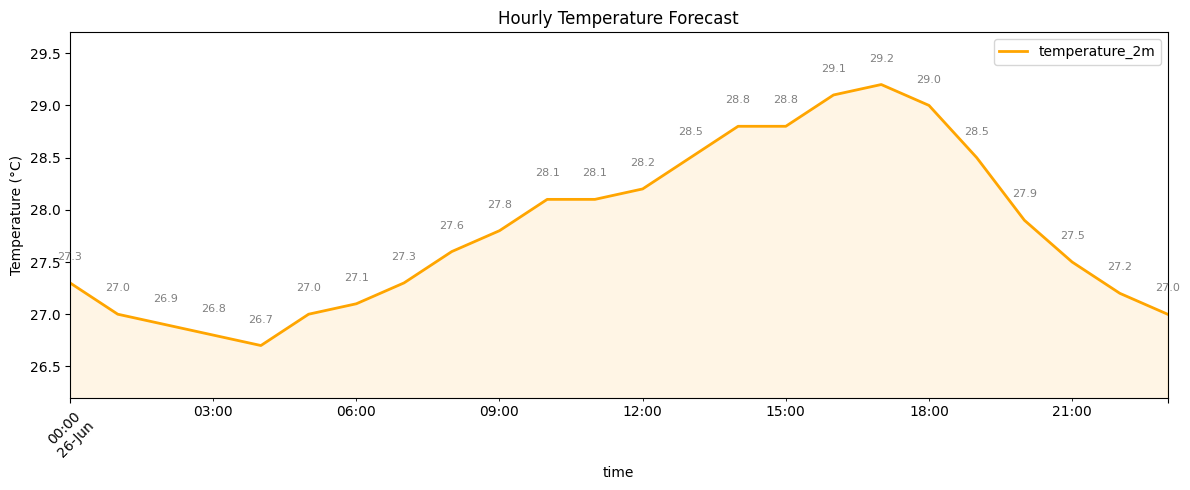

In [19]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12,5)

hourly_forecast_df.plot(kind='line', ax=ax, color='orange', linewidth=2)
ax.fill_between(
    hourly_forecast_df.index,
    hourly_forecast_df['temperature_2m'].values,
    color='orange', alpha=0.1
)

# Set the min/max value
y_min = hourly_forecast_df['temperature_2m'].min()
y_max = hourly_forecast_df['temperature_2m'].max()
y_range = y_max - y_min
padding = y_range * 0.2  # 20% headroom
ax.set_ylim(y_min - padding, y_max + padding)

# Add data labels
for x, y in zip(hourly_forecast_df.index, hourly_forecast_df['temperature_2m']):
    plt.text(
        x, y + 0.2,
        f'{y}',
        ha='center', va='bottom',
        fontsize=8, color='gray'
    )

plt.title('Hourly Temperature Forecast')
plt.ylabel('Temperature (°C)')

plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()

# Save the plot
output_file = 'hourly_forecast.png'
output_path = os.path.join(output_folder, output_file)
plt.savefig(output_path, dpi=300)

plt.show()

----

If you want to give feedback or share your experience with this tutorial, please comment below. (requires GitHub account)


<script src='https://utteranc.es/client.js'
    repo='spatialthoughts/geopython-tutorials'
    issue-term='pathname'
    theme='github-light'
    crossorigin='anonymous'
    async>
</script>